In [77]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Generar los equipos con sus jugadas y temporadas 

In [78]:
class equipo:
    def __init__(self, name):
        self.name = name
        self.play_values=['% Time','PPP','aFG%']
        self.temporadas=set()
        self.play={}
    
    def jugada(self,tipo,stats):
        if tipo not in self.play:
            self.play[tipo]=[stats]
        else:
            self.play[tipo].append(stats)
            
    def current_temporada(self,tempo):
        self.temporadas.add(tempo)
        
    def list_temporadas(self,tempo):
        self.temporadas=[x for x in tempo if x in self.temporadas]

In [79]:
#path1=r'D:/LNB/LNB ULTIMAS 5 TEMPORADAS'
#Carpera donde están las (cinco) carpetas de cada temporada
path_temporadas = '/home/nmoreyra/Documents/Academico/Repositorios/basketanalytics/Contenidos/database/lnb_ultimas_5_temporadas'
temporadas = sorted(os.listdir(path_temporadas)) #las listo y ordeno de 15_16 a 19_20
print(sorted(temporadas))

['15_16', '16_17', '17_18', '18_19', '19_20']


In [80]:
#creo lista que tenga los cinco fullpath de las temporadas
fullpath_temporadas = [ os.path.join(path_temporadas, temporada) for temporada in temporadas ]

path_1temp = os.path.join(path_temporadas, temporadas[0]) #arrancamos con la primera temporada
print(path_1temp)
pos = os.listdir(path_1temp)
pos

/home/nmoreyra/Documents/Academico/Repositorios/basketanalytics/Contenidos/database/lnb_ultimas_5_temporadas/15_16


['ATAQUE', 'DEFENSA']

In [81]:
temporadas

['15_16', '16_17', '17_18', '18_19', '19_20']

In [87]:
path_1temp_ATAQUE = os.path.join(path_1temp, pos[0])
path_1temp_DEFENSA = os.path.join(path_1temp, pos[1])
jugadas_ATAQUE = [ file_jugada for file_jugada in os.listdir(path_1temp_ATAQUE) if file_jugada[-5:] == '.xlsx' ]
jugadas_DEFENSA = [ file_jugada for file_jugada in os.listdir(path_1temp_DEFENSA) if file_jugada[-5:] == '.xlsx' ]
print(len(jugadas_ATAQUE))
print(len(jugadas_DEFENSA))

17
17


In [88]:
##no son los mismos equipos por temporada hay que generarlos de forma ineficiente lamentablemente
teams = set()
for temp in fullpath_temporadas: #recorremos las carpetas de las temporadas
    #print(temp)
    #elegimos un archivo de una jugada en particular pero sólo nos sirve para sacar los nombres de los equipos
    path_jugada = os.path.join(temp, pos[0], jugadas_ATAQUE[1])
    #generamos un dataframe, el header es porque tiene un formato de mierda y la tabla arranca en la fila N°4
    df = pd.read_excel(path_jugada, header = 3)
    #vamos de cada temporada extraemos del dataframe una lista con los nombres de los equipos y los vamos agregando a un set (no tiene duplicaciones)
    teams.update(df['Team'].tolist())


equipos = [] #lista de objetos de clase "equipo" (definida arriba)
for i in teams:
    equipos.append(equipo(i))

In [89]:
print(pos)
print(jugadas_ATAQUE == jugadas_DEFENSA)
jugadas_ATAQUE

['ATAQUE', 'DEFENSA']
True


['HALF COURT.xlsx',
 'SPOT UP.xlsx',
 'OFF SCREEN.xlsx',
 'CUT.xlsx',
 'TRANSITION.xlsx',
 'AROUND TO THE BASKET.xlsx',
 '4 SEGUNDOS.xlsx',
 'LONG RANGE.xlsx',
 'HAND OFF.xlsx',
 'MID RANGE.xlsx',
 'ROLL.xlsx',
 'P&R.xlsx',
 'OFF REB.xlsx',
 'OVERALL.xlsx',
 'POST UP.xlsx',
 'ISOLATION.xlsx',
 'P&R PASS OUT.xlsx']

In [90]:
#Intentaré aquí convertir todos los archivos de cada temporada en un csv para más comodidad (mia jeje)
for temp in fullpath_temporadas: #recorremos las carpetas de las temporadas
    for tipo_jugada in pos: #pos tiene dos elementos "ATAQUE" y "DEFENSA"
        for jugada in jugadas_ATAQUE:
            #EN LA TEMPORADA 19_20 LA JUGADA 'P&R INCLUID PASSES' EN DEFENSA FUE MEDIDA EN LUGAR DE 'P&R PASS OUT'. ES LA UNICA DIFERENCIA
            if temp == '/home/nmoreyra/Documents/Academico/Repositorios/basketanalytics/Contenidos/database/lnb_ultimas_5_temporadas/19_20' and tipo_jugada == 'DEFENSA' and jugada == 'P&R PASS OUT.xlsx':
                jugada = 'P&R INCLUID PASSES.xlsx'
            path_jugada = os.path.join(temp, tipo_jugada, jugada)
            new_name = path_jugada[:-5] + '.csv'
            #generamos un dataframe, el header es porque tiene un formato de mierda y la tabla arranca en la fila N°4
            df = pd.read_excel(path_jugada, header = 3)
            df.to_csv(new_name, index=False)

In [91]:
#teams es un conjunto de datos únicos (sin duplicaciones)
#entre las cinco temporadas, participaron 25 equipos distintos
print(teams,len(teams))

{'Club de Regatas Corrientes', 'Ferrocarril Oeste', 'Club Comunicaciones Corrientes', 'Club Deportivo Libertad', 'Instituto Atletico Central Cordoba', 'Weber Bahia', 'Club Ciclista Olimpico', 'Salta Basket', 'Peñarol Mar del Plata', 'Hispano Americano Rio Gallegos', 'Asociacion Atletica Quimsa', 'Club Atletico Argentino', 'San Lorenzo de Almagro', 'Centro Juventud Sionista', 'Club Echague de Parana', 'La Union', 'Club Atletico Platense Florida', 'Boca Juniors', 'Obras Basket', 'Gimnasia y Esgrima Comodoro Rivadavia', 'Asociación Deportiva Atenas', 'Club Estudiantes Concordia', 'Quilmes de Mar del Plata', 'Club San Martin', 'Club Atlético Lanús'} 25


In [92]:
temp_ppp = []
temp_afg = []
temp_pos = []
temp_trans = []

for i, k in enumerate(fullpath_temporadas):
    for i in jugadas_ATAQUE:
        #k es ruta a cada temporada
        # pos[0] es ATAQUE
        # i va recorriendo los archivos de cada jugada
        path_jugada = os.path.join(k, pos[0], i)
        df = pd.read_excel(path_jugada, header = 3)
        temp_teams = df['Team'].tolist()
        
        ##guardar stats overall de la temporada
        if i == 'OVERALL.xlsx':
            temp_ppp.append([k[-5:], df['PPP'].tolist()])
            temp_afg.append([k[-5:], df['aFG%'].tolist()])
            temp_pos.append([k[-5:], df['Poss / Game'].tolist()])
        
        ##guardar proporción de transiciones de la temporada
        if i == 'TRANSITION.xlsx':
            temp_trans.append([k[-5:], df['% Time'].tolist()])
    
        for j in equipos:
            if j.name in temp_teams:
                vals=df.loc[df['Team'] == j.name][['% Time','PPP','aFG%']].values.tolist()[0]
                j.jugada(i,vals)
                j.current_temporada(k)

In [93]:
##los set no retienen orden
for i in equipos:
    i.list_temporadas(temporadas)

### Se genera los objetos equipos que contienen 3 stats de cada tipo de jugada, por cada temporada de existencia del equipo en la liga

In [94]:
equipos[0].__dict__

{'name': 'Club de Regatas Corrientes',
 'play_values': ['% Time', 'PPP', 'aFG%'],
 'temporadas': [],
 'play': {'HALF COURT.xlsx': [[0.882, 0.938, 0.52],
   [0.871, 0.984, 0.546],
   [0.885, 0.933, 0.511],
   [0.844, 0.972, 0.535],
   [0.846, 0.951, 0.513]],
  'SPOT UP.xlsx': [[0.214, 1.011, 0.525],
   [0.218, 1.018, 0.534],
   [0.204, 1.006, 0.522],
   [0.218, 1.012, 0.517],
   [0.214, 1.098, 0.561]],
  'OFF SCREEN.xlsx': [[0.071, 0.923, 0.489],
   [0.047, 1.117, 0.595],
   [0.049, 0.924, 0.492],
   [0.047, 0.993, 0.525],
   [0.05, 0.953, 0.489]],
  'CUT.xlsx': [[0.097, 1.222, 0.664],
   [0.105, 1.251, 0.662],
   [0.093, 1.214, 0.624],
   [0.077, 1.408, 0.753],
   [0.067, 1.12, 0.581]],
  'TRANSITION.xlsx': [[0.118, 1.112, 0.633],
   [0.129, 1.254, 0.706],
   [0.115, 1.208, 0.674],
   [0.156, 1.196, 0.667],
   [0.154, 1.098, 0.63]],
  'AROUND TO THE BASKET.xlsx': [[0.296, 1.266, 0.61],
   [0.345, 1.304, 0.629],
   [0.353, 1.166, 0.564],
   [0.316, 1.316, 0.631],
   [0.323, 1.202, 0.578

In [ ]:
##tenemos overall para ver el desempeño de un equipo en terminos de eficiencia. half court en oposición a transition.

### Acá intentaré hacer un dataframe gigante

In [128]:
df_ataque = pd.DataFrame(columns=['Temp','Jugada','#', 'Team', 'GP', '% Time', 'Poss / Game', 'Points', 'PPP', 'FGm', 'FGM', 'FGA', 'FG%', 'aFG%', '%TO', '%FT', '%SF', '%Score'])
for temp in fullpath_temporadas: #recorremos las carpetas de las temporadas
    #print(temp[-5:])
    for tipo_jugada in pos: #pos tiene dos elementos "ATAQUE" y "DEFENSA"
        if tipo_jugada == 'ATAQUE':
            for jugada in jugadas_ATAQUE:
                path_jugada = os.path.join(temp, tipo_jugada, jugada)
                #generamos un dataframe, el header es porque tiene un formato de mierda y la tabla arranca en la fila N°4
                df_jugada = pd.read_excel(path_jugada, header = 3)
                largo_df = len(df_jugada)
                column_temp = largo_df*[temp[-5:]] #20*['15_16']
                column_jugada = largo_df*[jugada[:-5]]
                df_jugada['Temp'] = column_temp
                df_jugada['Jugada'] = column_jugada
                aux = df_ataque
                frames = [aux, df_jugada]
                df_ataque = pd.concat(frames)

In [130]:
#intentemos defensa
df_defensa = pd.DataFrame(columns=['Temp','Jugada','#', 'Team', 'GP', '% Time', 'Poss / Game', 'Points', 'PPP', 'FGm', 'FGM', 'FGA', 'FG%', 'aFG%', '%TO', '%FT', '%SF', '%Score'])
for temp in fullpath_temporadas: #recorremos las carpetas de las temporadas
    for tipo_jugada in pos: #pos tiene dos elementos "ATAQUE" y "DEFENSA"
        if tipo_jugada == 'DEFENSA':
            for jugada in jugadas_DEFENSA:
                #EN LA TEMPORADA 19_20 LA JUGADA 'P&R INCLUID PASSES' EN DEFENSA FUE MEDIDA EN LUGAR DE 'P&R PASS OUT'. ES LA UNICA DIFERENCIA
                if temp[-5:] == '19_20' and tipo_jugada == 'DEFENSA' and jugada == 'P&R PASS OUT.xlsx':
                    jugada = 'P&R INCLUID PASSES.xlsx'
                path_jugada = os.path.join(temp, tipo_jugada, jugada)
                #generamos un dataframe, el header es porque tiene un formato de mierda y la tabla arranca en la fila N°4
                df_jugada = pd.read_excel(path_jugada, header = 3)
                largo_df = len(df_jugada)
                column_temp = largo_df*[temp[-5:]] #20*['15_16']
                column_jugada = largo_df*[jugada[:-5]]
                df_jugada['Temp'] = column_temp
                df_jugada['Jugada'] = column_jugada
                aux = df_defensa
                frames = [aux, df_jugada]
                df_defensa = pd.concat(frames)

In [137]:
#perdón pero me gusta más lo tabulado
df_ataque.to_csv('../../database/lnb_ultimas_5_temporadas/ATAQUE_cinco-temporadas.tsv', sep='\t')
df_defensa.to_csv('../../database/lnb_ultimas_5_temporadas/DEFENSA_cinco-temporadas.tsv', sep='\t')

In [151]:
mask = df_ataque['#'].between(1,4)
df_ataque['Podio']  = pd.Categorical(np.where(mask, 'Top4', 'outer'))
df_ataque[df_ataque['Podio'] == 'Top4']

#  % Time    %FT    %SF  %Score    %TO    FG%   FGA   FGM   FGm  GP  \
0   1   0.891  0.111  0.068   0.441  0.154  0.473  52.6  24.9  27.7  57   
1   2   0.869  0.126  0.080   0.434  0.131  0.441  52.5  23.2  29.3  52   
2   3   0.879  0.153  0.104   0.432  0.139  0.428  53.1  22.7  30.4  52   
3   4   0.866  0.142  0.099   0.435  0.151  0.446  50.8  22.7  28.1  57   
0   1   0.220  0.040  0.032   0.404  0.051  0.410  15.8   6.5   9.3  57   
1   2   0.215  0.059  0.041   0.412  0.053  0.407  15.2   6.2   9.0  52   
2   3   0.186  0.054  0.035   0.382  0.048  0.376  13.9   5.2   8.7  52   
3   4   0.214  0.035  0.021   0.373  0.062  0.381  15.6   5.9   9.6  57   
0   1   0.056  0.103  0.087   0.439  0.095  0.438   3.6   1.6   2.1  57   
1   2   0.101  0.063  0.048   0.410  0.063  0.409   7.1   2.9   4.2  52   
2   3   0.090  0.065  0.050   0.412  0.074  0.412   6.5   2.7   3.8  59   
3   4   0.066  0.074  0.048   0.395  0.074  0.396   4.7   1.9   2.9  57   
0   1   0.097  0.162  0.150   0.637  0.081  0.655   6.1   4.0   2.1  57   
1   2   0.080  0.194  0.183   0.642  0.082  0.660   5.0   3.3   1.7  57   
2   3   0.063  0.185  0.178   0.626  0.044  0.624   4.3   2.7   1.6  52   
3   4   0.097  0.181  0.163   0.628  0.084  0.664   6.1   4.0   2.0  57   
0   1   0.101  0.165  0.113   0.576  0.118  0.593   6.0   3.6   2.4  52   
1   2   0.118  0.159  0.108   0.570  0.132  0.617   7.2   4.4   2.8  64   
2   3   0.101  0.139  0.106   0.545  0.169  0.626   5.7   3.6   2.1  47   
3   4   0.109  0.130  0.095   0.527  0.134  0.567   6.5   3.7   2.8  57   
0   1   0.301  0.062  0.062   0.616  0.000  0.616  15.8   9.7   6.1  57   
1   2   0.296  0.074  0.074   0.610  0.000  0.610  15.6   9.5   6.1  57   
2   3   0.340  0.085  0.085   0.599  0.000  0.599  17.3  10.4   6.9  57   
3   4   0.245  0.090  0.090   0.587  0.000  0.587  12.8   7.5   5.3  52   
0   1   0.072  0.055  0.024   0.356  0.058  0.355   5.1   1.8   3.3  57   
1   2   0.094  0.100  0.083   0.377  0.083  0.361   6.4   2.3   4.1  57   
2   3   0.093  0.070  0.041   0.364  0.083  0.359   6.2   2.2   4.0  57   
3   4   0.097  0.068  0.047   0.360  0.104  0.367   6.5   2.4   4.1  57   
0   1   0.780  0.001  0.001   0.389  0.000  0.389  21.0   8.2  12.8  57   
1   2   0.784  0.002  0.002   0.358  0.000  0.358  21.1   7.6  13.6  60   
.. ..     ...    ...    ...     ...    ...    ...   ...   ...   ...  ..   
2   3   0.177  0.000  0.000   0.410  0.000  0.410   5.4   2.2   3.2  25   
3   4   0.124  0.000  0.000   0.408  0.000  0.408   3.2   1.3   1.9  24   
0   1   0.057  0.184  0.163   0.612  0.071  0.620   3.8   2.3   1.4  21   
1   2   0.061  0.102  0.102   0.577  0.073  0.609   4.4   2.7   1.7  26   
2   3   0.050  0.202  0.191   0.618  0.056  0.638   3.3   2.1   1.2  21   
3   4   0.043  0.092  0.092   0.554  0.200  0.688   2.8   1.9   0.9  17   
0   1   0.169  0.077  0.049   0.383  0.224  0.460  10.2   4.7   5.5  23   
1   2   0.202  0.078  0.060   0.381  0.135  0.404  14.0   5.7   8.3  26   
2   3   0.207  0.117  0.100   0.385  0.168  0.407  13.6   5.5   8.1  17   
3   4   0.159  0.110  0.082   0.394  0.191  0.431   9.6   4.1   5.5  21   
0   1   0.054  0.183  0.165   0.687  0.052  0.688   3.7   2.6   1.2  25   
1   2   0.034  0.185  0.138   0.631  0.092  0.680   2.2   1.5   0.7  23   
2   3   0.034  0.145  0.130   0.623  0.087  0.655   2.3   1.5   0.8  25   
3   4   0.064  0.269  0.223   0.600  0.054  0.606   4.0   2.4   1.6  25   
0   1   1.000  0.144  0.099   0.482  0.125  0.493  64.2  31.7  32.6  21   
1   2   1.000  0.125  0.082   0.462  0.135  0.481  64.1  30.9  33.3  23   
2   3   1.000  0.127  0.095   0.436  0.164  0.474  65.4  31.0  34.4  17   
3   4   1.000  0.111  0.085   0.438  0.136  0.463  63.5  29.4  34.1  22   
0   1   0.081  0.175  0.119   0.552  0.091  0.545   5.2   2.9   2.4  21   
1   2   0.113  0.205  0.134   0.510  0.159  0.549   6.3   3.5   2.8  26   
2   3   0.009  0.200  0.100   0.550  0.150  0.615   0.5   0.3   0.2  25   
3   4   0.096  0.212  0.152  

In [173]:
#acá intento un df para únicamente una jugada sobre todas las cinco temporadas
mask = df_ataque['#'].between(1,4)
df_ataque['Podio']  = pd.Categorical(np.where(mask, 'Top4', 'outer'))
#df_ataque[df_ataque['Podio'] == 'Top4']
df_ataque_PR_TRANSITION = df_ataque[ (df_ataque['Jugada'] == 'P&R') | (df_ataque['Jugada'] == 'TRANSITION')].copy()
print(df_ataque_PR_TRANSITION)

     #  % Time    %FT    %SF  %Score    %TO    FG%   FGA  FGM  FGm  GP  \
0    1   0.101  0.165  0.113   0.576  0.118  0.593   6.0  3.6  2.4  52   
1    2   0.118  0.159  0.108   0.570  0.132  0.617   7.2  4.4  2.8  64   
2    3   0.101  0.139  0.106   0.545  0.169  0.626   5.7  3.6  2.1  47   
3    4   0.109  0.130  0.095   0.527  0.134  0.567   6.5  3.7  2.8  57   
4    5   0.134  0.181  0.128   0.545  0.140  0.576   7.8  4.5  3.3  57   
5    6   0.138  0.150  0.095   0.523  0.127  0.556   8.6  4.8  3.8  57   
6    7   0.135  0.177  0.125   0.562  0.137  0.588   8.2  4.8  3.4  59   
7    8   0.155  0.134  0.091   0.523  0.119  0.543  10.0  5.4  4.6  69   
8    9   0.158  0.169  0.115   0.548  0.151  0.589   9.7  5.7  4.0  49   
9   10   0.131  0.140  0.099   0.521  0.162  0.573   7.5  4.3  3.2  52   
10  11   0.104  0.144  0.096   0.531  0.144  0.574   6.3  3.6  2.7  57   
11  12   0.118  0.147  0.097   0.532  0.146  0.579   6.9  4.0  2.9  57   
12  13   0.137  0.187  0.136   0.550  

/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.S

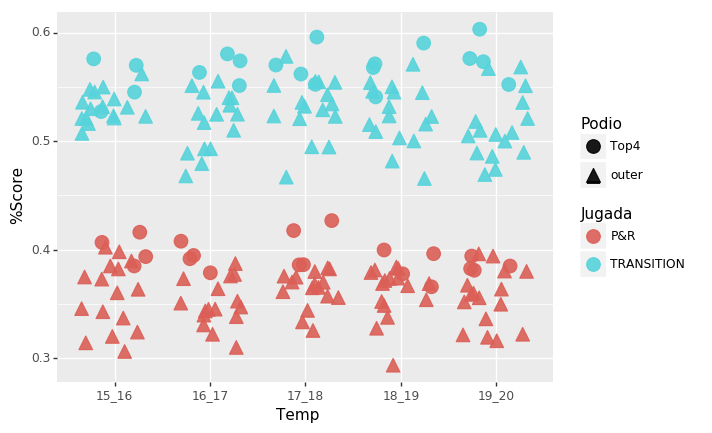

<ggplot: (-9223363269311768183)>

In [191]:
from plotnine import *

ggplot(df_ataque_PR_TRANSITION, aes(x='Temp',y='%Score',color='Jugada', shape='Podio')) + \
geom_jitter(size=5, alpha=0.9, width = 0.35)

/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.S

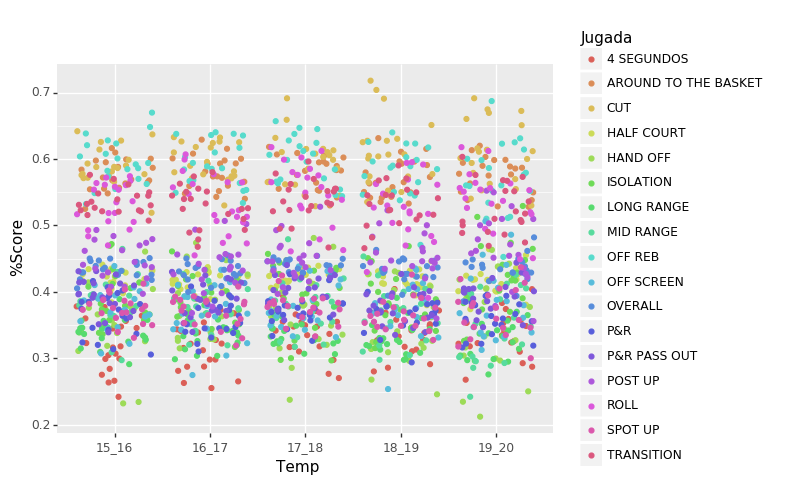

<ggplot: (8767542768574)>

In [211]:
ggplot(df_ataque, aes(x='Temp',y='%Score',color='Jugada')) + \
geom_jitter()

In [142]:
ggplot(df_ataque_PR, aes(x='Temp',y='%Score', group='Team',
color='Team', fill='Team',shape='#')) + \
geom_jitter(size=5, alpha=0.5, width = 0.38) + \
geom_boxplot(alpha=0.4, size=1, outlier_size=4.5, outlier_shape='x', outlier_colour="blue", show_legend=False) + \
xlab('Temporadas') + ylab('%Score') + \
theme(text=element_text(family="Tahoma", size=22, face="bold")) + \
theme(axis_text_x = element_blank(),
    axis_text_y = element_text(size=16, angle=0, hjust=1, face="bold")) + \
theme(axis_line=element_line(size=2, colour="black")) + \
theme(plot_title=element_text(size=28, family="Tahoma", face="bold")) + \
theme(legend_position='right', legend_direction='vertical', 
    legend_title_align='left', legend_box_margin=2,
    legend_title=element_text(size = 18, color='black'),
    legend_text=element_text(size=14)) + \
scale_color_discrete(guide=False)

/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/nmoreyra/Soft/miniconda3/envs/py36/lib/python3.6/site-packages/plotnine/facets/layout.py:147: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.S

IndexError: index 13 is out of bounds for axis 0 with size 13

### Separo lo que ya se hizo lo necesito

In [11]:
overall='OVERALL.xlsx'
tipo1=['TRANSITION.xlsx','HALF COURT.xlsx']
tipo2=['LONG RANGE.xlsx','MID RANGE.xlsx','AROUND TO THE BASKET.xlsx']

jug=jugada.copy()
for i in ['TRANSITION.xlsx','HALF COURT.xlsx','OVERALL.xlsx','LONG RANGE.xlsx','MID RANGE.xlsx',
          'AROUND TO THE BASKET.xlsx']:
    jug.remove(i)

In [11]:
tott=0
for i in jug:
    tott+=equipos[0].play[i][0][0]
print(tott)

1.02


In [26]:
##hay superposición entre las jugadas, habría que seguir separando para que el total de 1

### ejemplo de uso

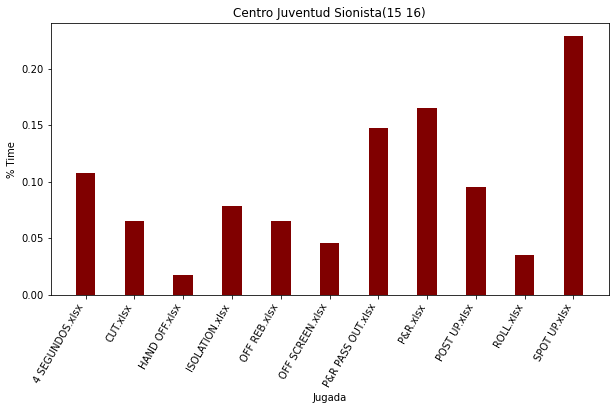

In [100]:
vals=[equipos[0].play[i][0][0] for i in jug]

fig = plt.figure(figsize = (10, 5))
 
plt.bar(jug, vals, color ='maroon',
        width = 0.4)

plt.xlabel("Jugada")
plt.ylabel(equipos[0].play_values[0])
plt.title(equipos[0].name + '('+equipos[0].temporadas[0]+')')
plt.xticks(rotation=60, ha='right')
plt.show()

## Evolución de la distribución de los valores overall de los equipos

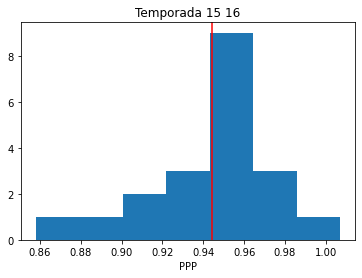

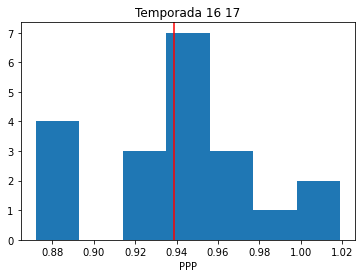

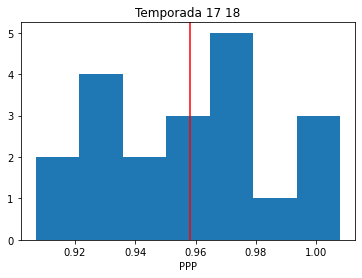

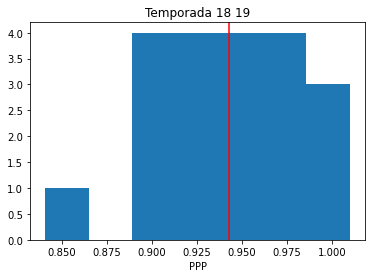

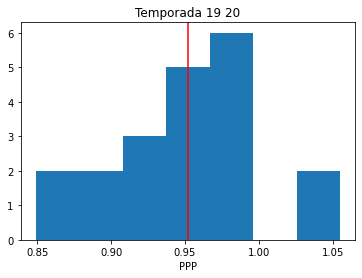

In [59]:
tot=[]
for i in temp_ppp:
    tot=tot+i[1]
    avg=np.mean(i[1])
    plt.hist(i[1],bins=7)
    plt.xlabel("PPP")
    plt.title('Temporada ' + i[0])
    plt.axvline(x=avg,c='red')
    plt.show()

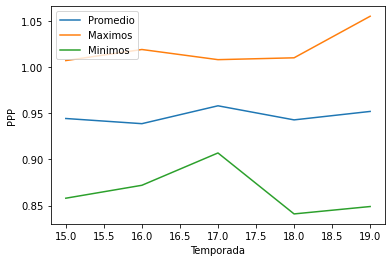

In [67]:
avgs=[np.mean(i[1]) for i in temp_ppp]
maxs=[np.max(i[1]) for i in temp_ppp]
mins=[np.min(i[1]) for i in temp_ppp]

años=[15,16,17,18,19]

plt.plot(años,avgs,label='Promedio')
plt.plot(años,maxs,label='Maximos')
plt.plot(años,mins,label='Minimos')

plt.xlabel("Temporada")
plt.ylabel('PPP')
plt.legend()
plt.show()

In [ ]:
##no hay una tendencia sensible en los ultimos 5 años, 20 equipos es muy poco para inferir nada en terminos de distribuciones.
##veamos que pasa si se combina todas la temporadas

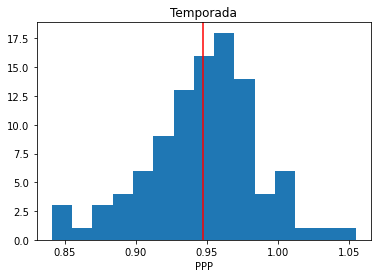

In [64]:
plt.hist(tot,bins=15)
plt.xlabel("PPP")
plt.title('Temporada')
plt.axvline(x=np.mean(tot),c='red')
plt.show()

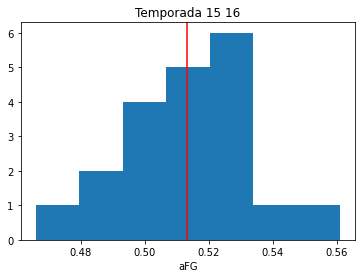

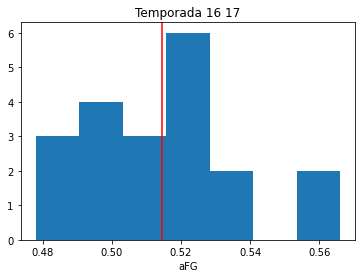

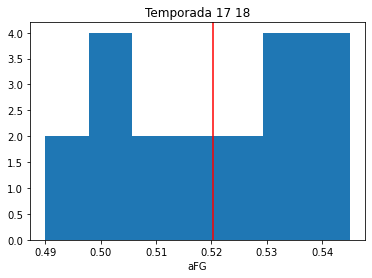

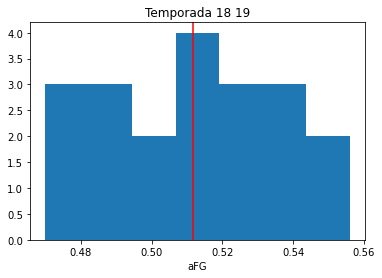

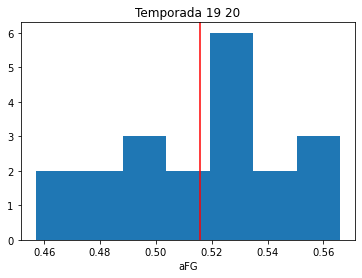

In [69]:
tot=[]
for i in temp_afg:
    tot=tot+i[1]
    avg=np.mean(i[1])
    plt.hist(i[1],bins=7)
    plt.xlabel("aFG")
    plt.title('Temporada ' + i[0])
    plt.axvline(x=avg,c='red')
    plt.show()

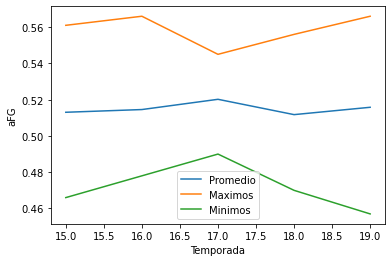

In [68]:
avgs=[np.mean(i[1]) for i in temp_afg]
maxs=[np.max(i[1]) for i in temp_afg]
mins=[np.min(i[1]) for i in temp_afg]

años=[15,16,17,18,19]

plt.plot(años,avgs,label='Promedio')
plt.plot(años,maxs,label='Maximos')
plt.plot(años,mins,label='Minimos')

plt.xlabel("Temporada")
plt.ylabel('aFG')
plt.legend()
plt.show()

In [ ]:
##en lo que respecta eficiencia ofensiva en general no ha habido una evolución aparente en los ultimos años.

## Evolución en la velocidad del juego 

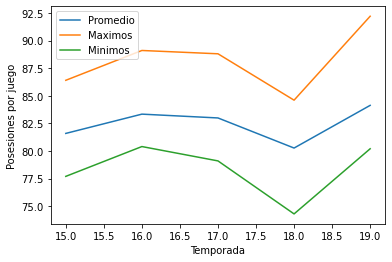

In [8]:
avgs=[np.mean(i[1]) for i in temp_pos]
maxs=[np.max(i[1]) for i in temp_pos]
mins=[np.min(i[1]) for i in temp_pos]

años=[15,16,17,18,19]

plt.plot(años,avgs,label='Promedio')
plt.plot(años,maxs,label='Maximos')
plt.plot(años,mins,label='Minimos')

plt.xlabel("Temporada")
plt.ylabel('Posesiones por juego')
plt.legend()
plt.show()

In [73]:
##el ritmo de juego tuvo un bache en la temporada 18-19 y luego repuntó con fuerza

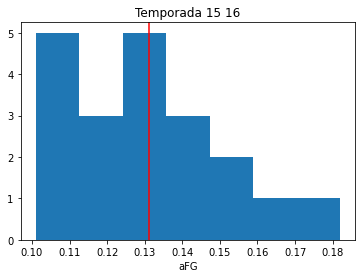

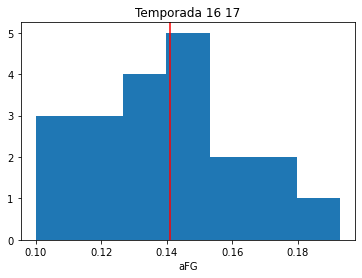

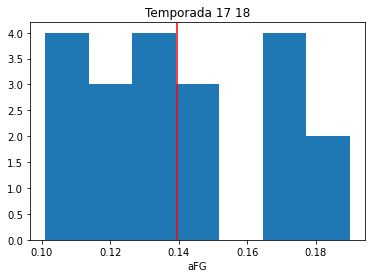

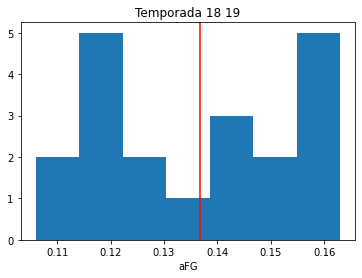

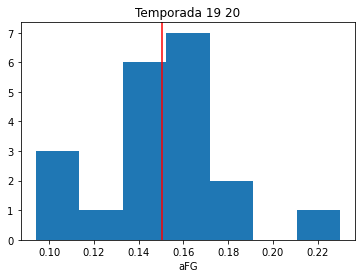

In [77]:
for i in temp_trans:
    tot=tot+i[1]
    avg=np.mean(i[1])
    plt.hist(i[1],bins=7)
    plt.xlabel("aFG")
    plt.title('Temporada ' + i[0])
    plt.axvline(x=avg,c='red')
    plt.show()

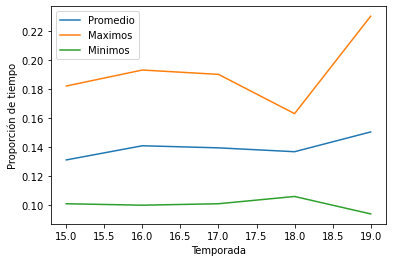

In [18]:
avgs=[np.mean(i[1]) for i in temp_trans]
maxs=[np.max(i[1]) for i in temp_trans]
mins=[np.min(i[1]) for i in temp_trans]

años=[15,16,17,18,19]

plt.plot(años,avgs,label='Promedio')
plt.plot(años,maxs,label='Maximos')
plt.plot(años,mins,label='Minimos')

plt.xlabel("Temporada")
plt.ylabel('Proporción de tiempo')
plt.legend()
plt.show()

In [ ]:
##se aprecia un leve aumento en la proporción de jugadas de transición, también la existencia de un equipo que "corrió" mucho más que el resto

## Rankeo de las jugadas según la temporada

### Distribución de tiempo 

In [107]:
ranks=[]
for i in temporada:
    rank_jug=[0 for i in range(len(jug))]
    for j in equipos:
        if i in j.temporadas:
            temp_pos=j.temporadas.index(i)
            count=0
            for k in jug:
                rank_jug[count] = rank_jug[count] + j.play[k][temp_pos][0]/20.
                count+=1
    ranks.append(rank_jug)      

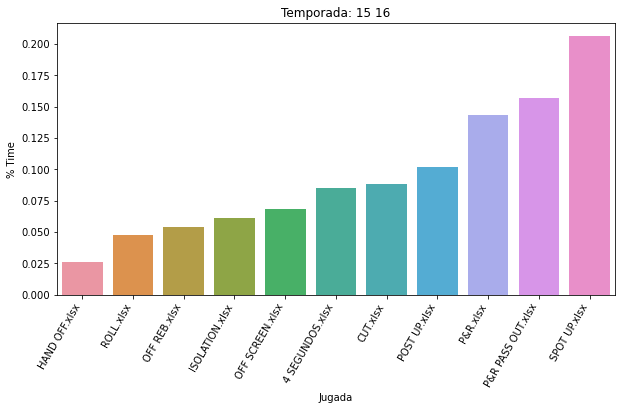

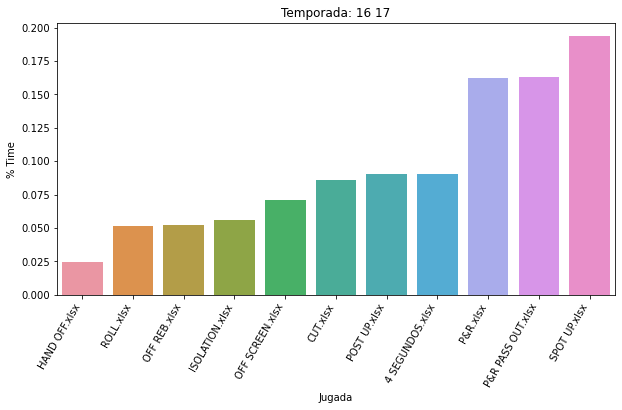

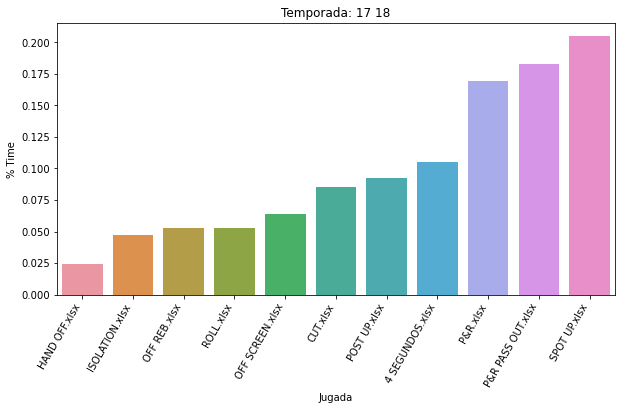

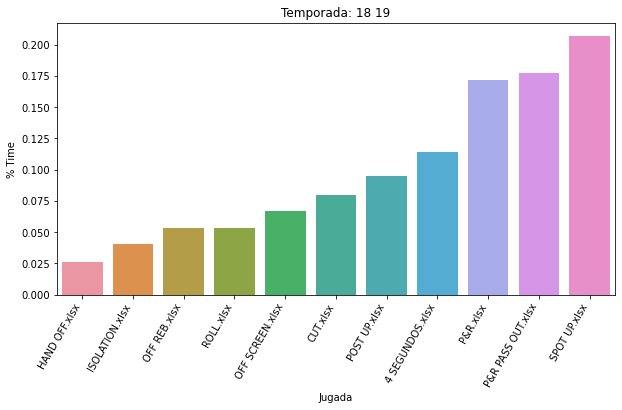

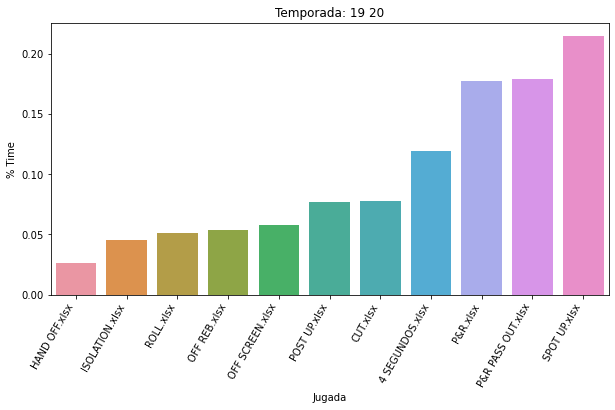

In [120]:
count=0
for i in ranks:
    order=np.argsort(i)
    fig = plt.figure(figsize = (10, 5))
 
    sns.barplot(x=np.array(jug)[order], y=np.array(i)[order])

    plt.xlabel("Jugada")
    plt.ylabel(equipos[0].play_values[0])
    plt.title('Temporada: ' + temporada[count])
    plt.xticks(rotation=60, ha='right')
    plt.show()
    count+=1

In [117]:
##Las jugadas que terminan en spot up ó derivadas de P&R son las más usuales en incluso se separaron un poco más del resto.
##Las jugadas de isolation perdieron bastante terreno, así como cut y los posteos en menor medida. Jugadas de 4 segundos 
##ascendieron para ubicarse como distintiva cuarta opción

array([0.02605, 0.04755, 0.05385, 0.0609 , 0.0683 , 0.08525, 0.0879 ,
       0.102  , 0.1431 , 0.15645, 0.20645])

### Eficiencia

In [125]:
ranks=[]
for i in temporada:
    rank_jug=[0 for i in range(len(jug))]
    for j in equipos:
        if i in j.temporadas:
            temp_pos=j.temporadas.index(i)
            count=0
            for k in jug:
                rank_jug[count] = rank_jug[count] + j.play[k][temp_pos][1]/20.
                count+=1
    ranks.append(rank_jug)

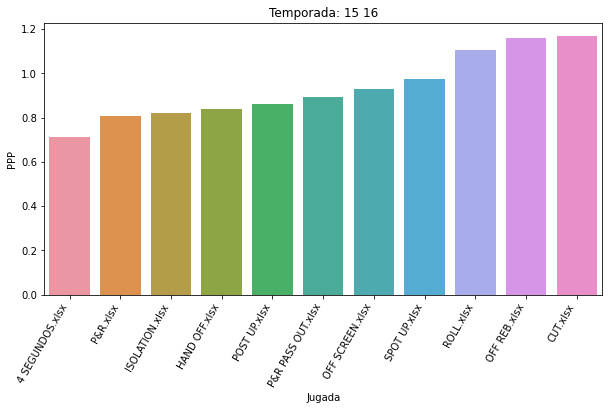

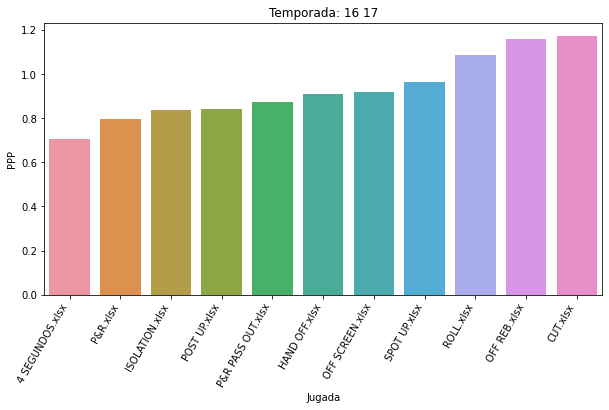

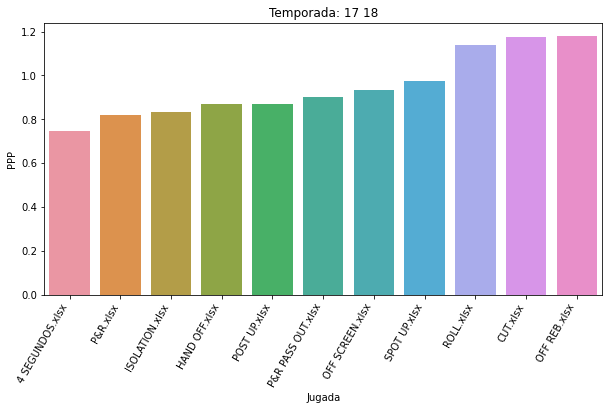

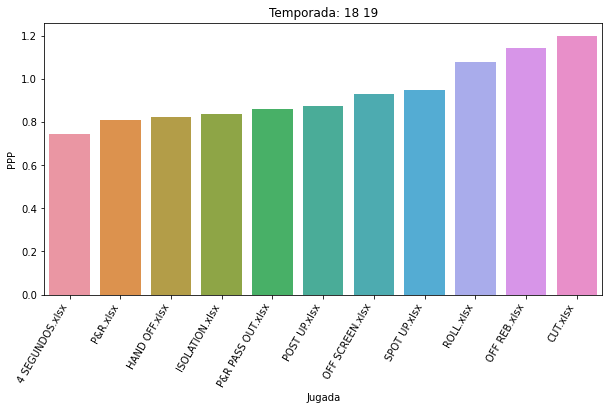

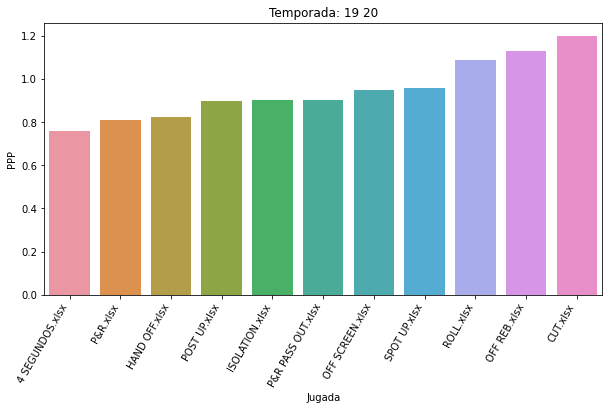

In [127]:
count=0
for i in ranks:
    order=np.argsort(i)
    fig = plt.figure(figsize = (10, 5))
 
    sns.barplot(x=np.array(jug)[order], y=np.array(i)[order])

    plt.xlabel("Jugada")
    plt.ylabel(equipos[0].play_values[1])
    plt.title('Temporada: ' + temporada[count])
    plt.xticks(rotation=60, ha='right')
    plt.show()
    count+=1

In [ ]:
##No muy sorpresivamente las jugadas que terminan en bandeja, volcada o un tiro cerca del aro con la defensa colapsada son 
##aquellas más rendidoras. Por otro lado, 4 segundos que favorece el ritmo de juego, es la peor rankeada.
##Las jugadas de isolation han experimentado un aumento en su eficacia

## Ubicación de los tiros

### Distribución de tiempo 

In [13]:
ranks=[]
for i in temporada:
    rank_jug=[0 for i in range(len(tipo2))]
    for j in equipos:
        if i in j.temporadas:
            temp_pos=j.temporadas.index(i)
            count=0
            for k in tipo2:
                rank_jug[count] = rank_jug[count] + j.play[k][temp_pos][0]/20.
                count+=1
    ranks.append(rank_jug)

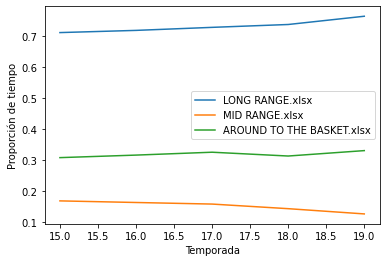

In [14]:
avgs=[i[0] for i in ranks]
maxs=[i[1] for i in ranks]
mins=[i[2] for i in ranks]

años=[15,16,17,18,19]

plt.plot(años,avgs,label=tipo2[0])
plt.plot(años,maxs,label=tipo2[1])
plt.plot(años,mins,label=tipo2[2])

plt.xlabel("Temporada")
plt.ylabel('Proporción de tiempo')
plt.legend()
plt.show()

In [15]:
##Media distancia está en caida mientras los otros dos posiciones mejoran

### Eficiencia

In [16]:
ranks=[]
for i in temporada:
    rank_jug=[0 for i in range(len(tipo2))]
    for j in equipos:
        if i in j.temporadas:
            temp_pos=j.temporadas.index(i)
            count=0
            for k in tipo2:
                rank_jug[count] = rank_jug[count] + j.play[k][temp_pos][1]/20.
                count+=1
    ranks.append(rank_jug)

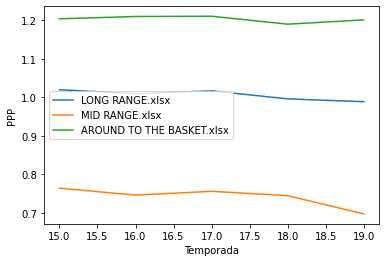

In [17]:
avgs=[i[0] for i in ranks]
maxs=[i[1] for i in ranks]
mins=[i[2] for i in ranks]

años=[15,16,17,18,19]

plt.plot(años,avgs,label=tipo2[0])
plt.plot(años,maxs,label=tipo2[1])
plt.plot(años,mins,label=tipo2[2])

plt.xlabel("Temporada")
plt.ylabel('PPP')
plt.legend()
plt.show()

In [ ]:
##No parece haber mejoras en la eficacia de las ubicaciones 

## Ensayo de Clustering

In [20]:
equipos[0].__dict__

{'name': 'Club Echague de Parana',
 'play_values': ['% Time', 'PPP', 'aFG%'],
 'temporadas': ['16 17'],
 'play': {'4 SEGUNDOS.xlsx': [[0.069, 0.609, 0.323]],
  'AROUND TO THE BASKET.xlsx': [[0.331, 1.147, 0.552]],
  'CUT.xlsx': [[0.065, 1.133, 0.621]],
  'HALF COURT.xlsx': [[0.853, 0.863, 0.487]],
  'HAND OFF.xlsx': [[0.019, 1.115, 0.606]],
  'ISOLATION.xlsx': [[0.079, 0.887, 0.427]],
  'LONG RANGE.xlsx': [[0.761, 1.002, 0.5]],
  'MID RANGE.xlsx': [[0.126, 0.839, 0.417]],
  'OFF REB.xlsx': [[0.054, 1.162, 0.607]],
  'OFF SCREEN.xlsx': [[0.04, 0.966, 0.515]],
  'OVERALL.xlsx': [[1.0, 0.889, 0.498]],
  'P&R PASS OUT.xlsx': [[0.183, 0.834, 0.529]],
  'P&R.xlsx': [[0.174, 0.689, 0.393]],
  'POST UP.xlsx': [[0.086, 0.697, 0.394]],
  'ROLL.xlsx': [[0.067, 0.948, 0.507]],
  'SPOT UP.xlsx': [[0.19, 1.021, 0.527]],
  'TRANSITION.xlsx': [[0.147, 1.042, 0.564]]}}

In [28]:
cols=['Equipo']
plays=list(equipos[0].play.keys())
plays.remove('OVERALL.xlsx')
valores=['_%Time','_aFG%']
for i in plays:
    cols.append(i.replace('.xlsx',valores[0]))
    cols.append(i.replace('.xlsx',valores[1]))

teams = pd.DataFrame(columns = cols)

In [33]:
teams

Empty DataFrame
Columns: [Equipo, 4 SEGUNDOS_%Time, 4 SEGUNDOS_aFG%, AROUND TO THE BASKET_%Time, AROUND TO THE BASKET_aFG%, CUT_%Time, CUT_aFG%, HALF COURT_%Time, HALF COURT_aFG%, HAND OFF_%Time, HAND OFF_aFG%, ISOLATION_%Time, ISOLATION_aFG%, LONG RANGE_%Time, LONG RANGE_aFG%, MID RANGE_%Time, MID RANGE_aFG%, OFF REB_%Time, OFF REB_aFG%, OFF SCREEN_%Time, OFF SCREEN_aFG%, P&R PASS OUT_%Time, P&R PASS OUT_aFG%, P&R_%Time, P&R_aFG%, POST UP_%Time, POST UP_aFG%, ROLL_%Time, ROLL_aFG%, SPOT UP_%Time, SPOT UP_aFG%, TRANSITION_%Time, TRANSITION_aFG%]
Index: []

[0 rows x 33 columns]

In [39]:
for k in equipos:
    for j in range(len(k.temporadas)):
        equip=[]

        equip.append(k.name+'_'+k.temporadas[j])
        for i in plays:
            equip.append(k.play[i][j][0])
            equip.append(k.play[i][j][1])
            
        teams.loc[len(teams)] = equip

In [40]:
teams

Equipo  4 SEGUNDOS_%Time  4 SEGUNDOS_aFG%  \
0     Club Echague de Parana_16 17             0.069            0.609   
1               Salta Basket_17 18             0.143            0.796   
2    Club Deportivo Libertad_15 16             0.086            0.679   
3    Club Deportivo Libertad_16 17             0.094            0.768   
4    Club Deportivo Libertad_18 19             0.107            0.785   
..                             ...               ...              ...   
95              Obras Basket_19 20             0.100            0.830   
96  Quilmes de Mar del Plata_15 16             0.076            0.676   
97  Quilmes de Mar del Plata_16 17             0.073            0.679   
98  Quilmes de Mar del Plata_17 18             0.069            0.614   
99  Quilmes de Mar del Plata_18 19             0.095            0.679   

    AROUND TO THE BASKET_%Time  AROUND TO THE BASKET_aFG%  CUT_%Time  \
0                        0.331                      1.147      0.065   
1                        0.291                      1.248      0.091   
2                        0.306                      1.186      0.082   
3                        0.342                      1.151      0.064   
4                        0.362                      1.171      0.116   
..                         ...                        ...        ...   
95                       0.360                      1.220      0.079   
96                       0.284                      1.245      0.063   
97                       0.305                      1.165      0.057   
98                       0.291                      1.206      0.072   
99                       0.271                      1.129      0.060   

    CUT_aFG%  HALF COURT_%Time  HALF COURT_aFG%  HAND OFF_%Time  ...  \
0      1.133             0.853            0.863           0.019  ...   
1      1.187             0.895            0.912           0.028  ...   
2      1.155             0.882            0.933           0.018  ...   
3      1.194             0.892            0.907           0.022  ...   
4      1.186             0.894            0.917           0.029  ...   
..       ...               ...              ...             ...  ...   
95     1.075             0.817            0.912           0.036  ...   
96     1.237             0.879            0.946           0.023  ...   
97     1.104             0.863            0.914           0.020  ...   
98     1.031             0.869            0.991           0.034  ...   
99     1.142             0.886            0.867           0.029  ...   

    P&R_%Time  P&R_aFG%  POST UP_%Time  POST UP_aFG%  ROLL_%Time  ROLL_aFG%  \
0       0.174     0.689          0.086         0.697       0.067      0.948   
1       0.184     0.837          0.095         0.793       0.043      1.306   
2       0.175     0.863          0.109         0.909       0.045      1.114   
3       0.213     0.877          0.052         0.768       0.044      1.014   
4       0.136     0.795          0.096         0.763       0.049      0.992   
..        ...       ...            ...           ...         ...        ...   
95      0.175     0.864          0.075         0.895       0.040      1.111   
96      0.168     0.908          0.080         0.944       0.039      1.142   
97      0.253     0.869          0.050         0.684       0.052      1.046   
98      0.212     0.873          0.086         1.007       0.057      1.267   
99      0.228     0.732          0.076         0.882       0.066      1.110   

    SPOT UP_%Time  SPOT UP_aFG%  TRANSITION_%Time  TRANSITION_aFG%  
0           0.190         1.021             0.147            1.042  
1           0.249         0.963             0.105            1.159  
2           0.254         0.956             0.118            1.206  
3           0.233         0.970             0.108            1.217  
4           0.219         0.950             0.106            1.148  
..            ...           ...               ...         

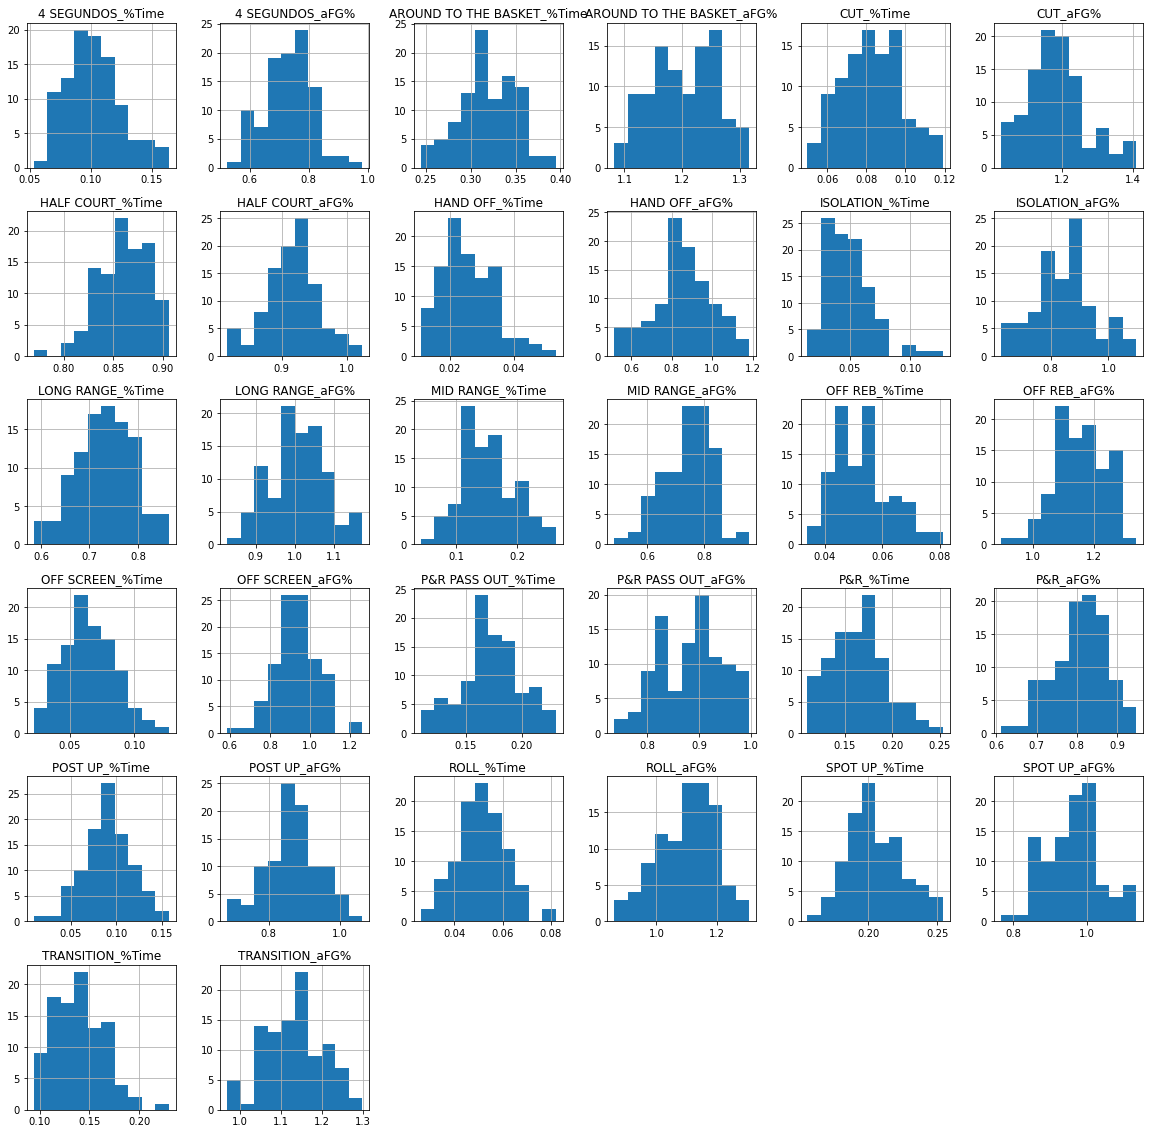

In [50]:
teams.drop(['Equipo'],axis=1).hist(figsize=(20,20))

plt.show()

### Estandarización del dataset

In [52]:
from sklearn import preprocessing

teamscluster=teams.copy()

teamscluster.drop(['Equipo'],axis=1,inplace=True)

##scaleo de los datos
trans = preprocessing.MinMaxScaler()
minmaxdata=trans.fit_transform(teamscluster)
teamscluster[teamscluster.columns]=minmaxdata

teamscluster.head()

4 SEGUNDOS_%Time  4 SEGUNDOS_aFG%  AROUND TO THE BASKET_%Time  \
0          0.144144         0.185590                    0.576159   
1          0.810811         0.593886                    0.311258   
2          0.297297         0.338428                    0.410596   
3          0.369369         0.532751                    0.649007   
4          0.486486         0.569869                    0.781457   

   AROUND TO THE BASKET_aFG%  CUT_%Time  CUT_aFG%  HALF COURT_%Time  \
0                   0.277778   0.217391  0.278215          0.610294   
1                   0.709402   0.594203  0.419948          0.919118   
2                   0.444444   0.463768  0.335958          0.823529   
3                   0.294872   0.202899  0.438320          0.897059   
4                   0.380342   0.956522  0.417323          0.911765   

   HALF COURT_aFG%  HAND OFF_%Time  HAND OFF_aFG%  ...  P&R_%Time  P&R_aFG%  \
0         0.225962        0.190476       0.896861  ...   0.443662  0.231454   
1         0.461538        0.404762       0.423019  ...   0.514085  0.670623   
2         0.562500        0.166667       0.518685  ...   0.450704  0.747774   
3         0.437500        0.261905       0.529148  ...   0.718310  0.789318   
4         0.485577        0.428571       0.281016  ...   0.176056  0.545994   

   POST UP_%Time  POST UP_aFG%  ROLL_%Time  ROLL_aFG%  SPOT UP_%Time  \
0       0.516779      0.034301    0.732143   0.197309       0.346939   
1       0.577181      0.287599    0.303571   1.000000       0.948980   
2       0.671141      0.593668    0.339286   0.569507       1.000000   
3       0.288591      0.221636    0.321429   0.345291       0.785714   
4       0.583893      0.208443    0.410714   0.295964       0.642857   

   SPOT UP_aFG%  TRANSITION_%Time  TRANSITION_aFG%  
0      0.692098          0.389706         0.219512  
1      0.534060          0.080882         0.576220  
2      0.514986          0.176471         0.719512  
3      0.553134          0.102941         0.753049  
4      0.498638          0.088235         0.542683  

[5 rows x 32 columns]

In [143]:
from sklearn.cluster import DBSCAN

clusterDB = DBSCAN(eps=1,min_samples=3,n_jobs=-1).fit(teamscluster)

In [144]:
##2 clusters más los excluidos (-1)
set(clusterDB.labels_)

teams['cluster']=clusterDB.labels_
print(teams['cluster'].value_counts())

-1    60
 0    35
 1     5
Name: cluster, dtype: int64


In [145]:
teams.drop(['Equipo'],axis=1).groupby('cluster').mean()

4 SEGUNDOS_%Time  4 SEGUNDOS_aFG%  AROUND TO THE BASKET_%Time  \
cluster                                                                  
-1               0.105350         0.731067                    0.321883   
 0               0.099914         0.747314                    0.317457   
 1               0.094000         0.655600                    0.293600   

         AROUND TO THE BASKET_aFG%  CUT_%Time  CUT_aFG%  HALF COURT_%Time  \
cluster                                                                     
-1                        1.194250   0.081950  1.175333           0.86185   
 0                        1.220829   0.087629  1.206229           0.85520   
 1                        1.175800   0.070600  1.135000           0.87660   

         HALF COURT_aFG%  HAND OFF_%Time  HAND OFF_aFG%  ...  P&R_%Time  \
cluster                                                  ...              
-1              0.912633        0.026233       0.855483  ...   0.170033   
 0              0.931314        0.025486       0.843400  ...   0.150143   
 1              0.872400        0.020600       0.893000  ...   0.200800   

         P&R_aFG%  POST UP_%Time  POST UP_aFG%  ROLL_%Time  ROLL_aFG%  \
cluster                                                                 
-1       0.809833       0.088767      0.859433    0.050967   1.081717   
 0       0.814400       0.095829      0.892600    0.051029   1.132429   
 1       0.753600       0.088600      0.838200    0.056200   1.088400   

         SPOT UP_%Time  SPOT UP_aFG%  TRANSITION_%Time  TRANSITION_aFG%  
cluster                                                                  
-1            0.205783      0.959300           0.13815         1.129483  
 0            0.206257      0.981229           0.14480         1.140371  
 1            0.196600      0.896000           0.12340         1.127800  

[3 rows x 32 columns]

In [166]:
from sklearn.cluster import OPTICS

clusterOPS = OPTICS(min_samples=3, max_eps=1,n_jobs=-1).fit(teamscluster)

In [167]:
set(clusterOPS.labels_)

teams['cluster']=clusterOPS.labels_
print(teams['cluster'].value_counts())

-1    86
 0     9
 1     5
Name: cluster, dtype: int64


In [161]:
teams.drop(['Equipo'],axis=1).groupby('cluster').mean()

4 SEGUNDOS_%Time  4 SEGUNDOS_aFG%  AROUND TO THE BASKET_%Time  \
cluster                                                                  
-1               0.102465         0.732942                    0.320407   
 0               0.111778         0.776333                    0.318778   
 1               0.094000         0.655600                    0.293600   

         AROUND TO THE BASKET_aFG%  CUT_%Time  CUT_aFG%  HALF COURT_%Time  \
cluster                                                                     
-1                        1.198558   0.084326  1.180663          0.861070   
 0                        1.256444   0.081333  1.244556          0.843444   
 1                        1.175800   0.070600  1.135000          0.876600   

         HALF COURT_aFG%  HAND OFF_%Time  HAND OFF_aFG%  ...  P&R_%Time  \
cluster                                                  ...              
-1              0.916128        0.026221       0.854686  ...   0.162930   
 0              0.951889        0.023444       0.816111  ...   0.160556   
 1              0.872400        0.020600       0.893000  ...   0.200800   

         P&R_aFG%  POST UP_%Time  POST UP_aFG%  ROLL_%Time  ROLL_aFG%  \
cluster                                                                 
-1       0.807360       0.090756      0.864837    0.050593   1.091430   
 0       0.851222       0.097222      0.936778    0.054778   1.186111   
 1       0.753600       0.088600      0.838200    0.056200   1.088400   

         SPOT UP_%Time  SPOT UP_aFG%  TRANSITION_%Time  TRANSITION_aFG%  
cluster                                                                  
-1            0.205826      0.965233          0.138930         1.127081  
 0            0.207222      0.987889          0.156556         1.194778  
 1            0.196600      0.896000          0.123400         1.127800  

[3 rows x 32 columns]